<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import math

In [2]:
driver = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/drivers.csv')
driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [3]:
circuit = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/circuits.csv')
circuit.head() 

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [4]:
lap = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/lap_times.csv')
lap.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [5]:
quali = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/qualifying.csv')
quali.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [6]:
race = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/races.csv')
race.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [7]:
result = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/results.csv')
result.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [8]:
status = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/status.csv')
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [9]:
construc = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/F1/constructors.csv')
construc.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


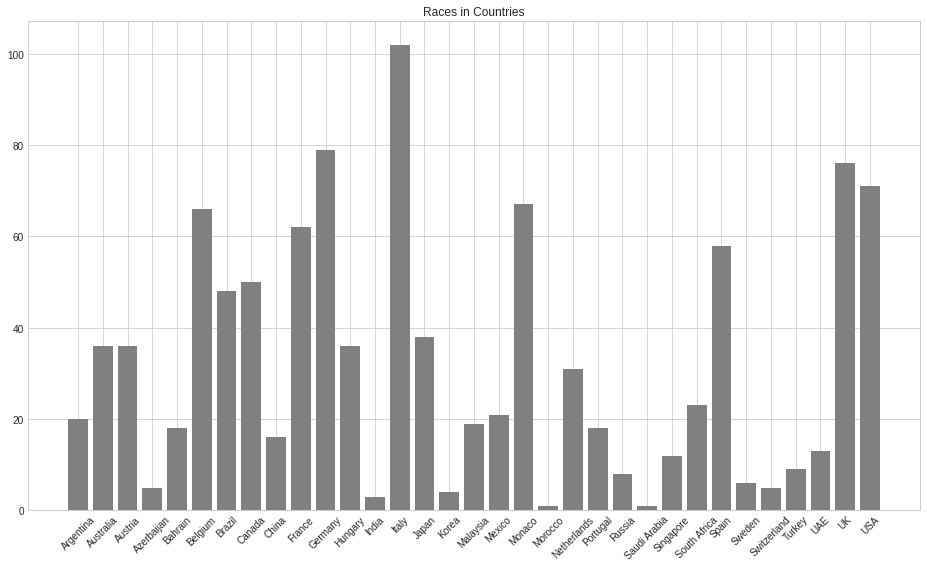

In [ ]:
df = pd.merge(race,circuit,on = 'circuitId')
Natcount = df.groupby('country').agg({'country':'count'})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (16,9))
plt.bar(Natcount.index, Natcount['country'],color = 'grey')
plt.title('Races in Countries')
plt.xticks(rotation = 45)
plt.show()

In [10]:
result1 = result[['resultId', 'raceId', 'driverId','constructorId','grid','position','points','time','rank','statusId']]
circuit1 = circuit[['circuitId','name','country']]
race1 = race[['raceId','year','circuitId']]
driver1 = driver[['driverId','forename','surname','nationality']]
construc1 = construc[['constructorId','name','nationality']]

df = pd.merge(result1,status, on = 'statusId')
df = pd.merge(df,race1,on = 'raceId')
df = pd.merge(df,circuit1, on = 'circuitId')
df = pd.merge(df,driver1, on = 'driverId')
df = pd.merge(df,construc, on = 'constructorId')

df = df.rename(columns = {'name_x':'circuit','name_y ':'constructors','nationality_x':'driver_nation','nationality_y':'constructor_nation'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25140 entries, 0 to 25139
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resultId            25140 non-null  int64  
 1   raceId              25140 non-null  int64  
 2   driverId            25140 non-null  int64  
 3   constructorId       25140 non-null  int64  
 4   grid                25140 non-null  int64  
 5   position            25140 non-null  object 
 6   points              25140 non-null  float64
 7   time                25140 non-null  object 
 8   rank                25140 non-null  object 
 9   statusId            25140 non-null  int64  
 10  status              25140 non-null  object 
 11  year                25140 non-null  int64  
 12  circuitId           25140 non-null  int64  
 13  circuit             25140 non-null  object 
 14  country             25140 non-null  object 
 15  forename            25140 non-null  object 
 16  surn

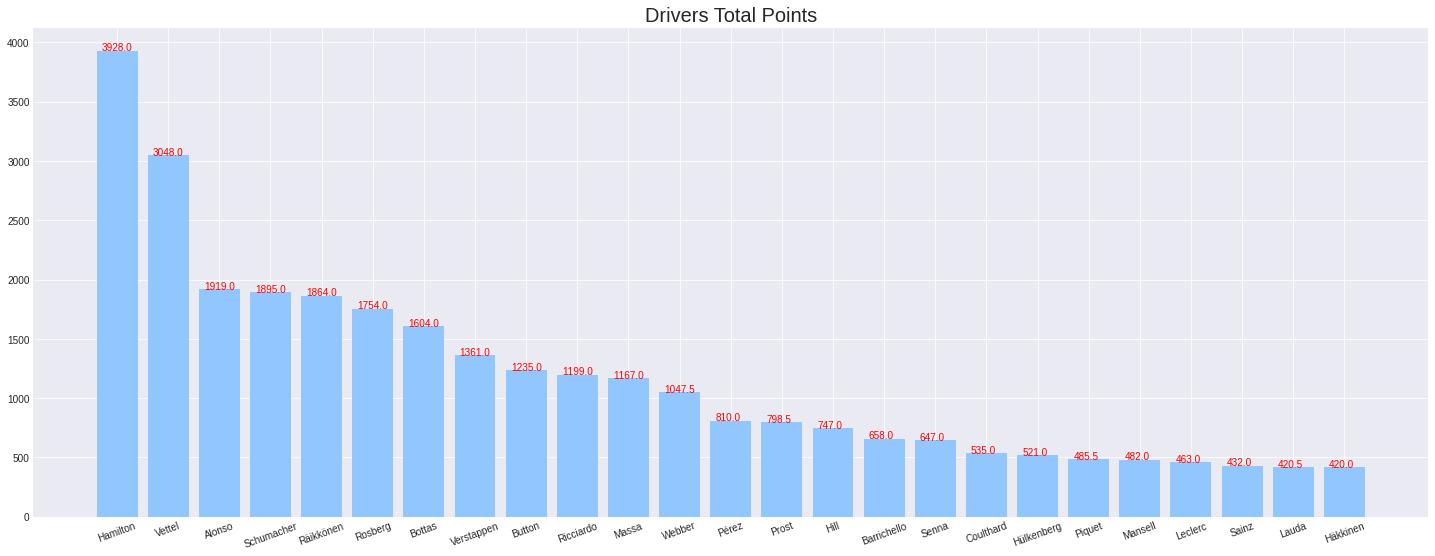

In [ ]:
temp = df.groupby('surname').agg({'points':'sum','position':'mean'})
temp.columns = temp.columns.get_level_values(0)
temp1 = temp.sort_values(by = 'points', ascending = False).head(25)
label = temp1.points
j = 0

plt.style.use('seaborn-pastel')
plt.figure(figsize = (25,9))
plt.bar(temp1.index, temp1.points)
for i in range(len(label)):
    plt.text(x = j-0.30 , y = label[i]+0.1, s = label[i], size = 10, color = 'red')
    j = j+1
plt.title('Drivers Total Points', fontsize = 20)
plt.xticks(rotation = 20)
plt.show()

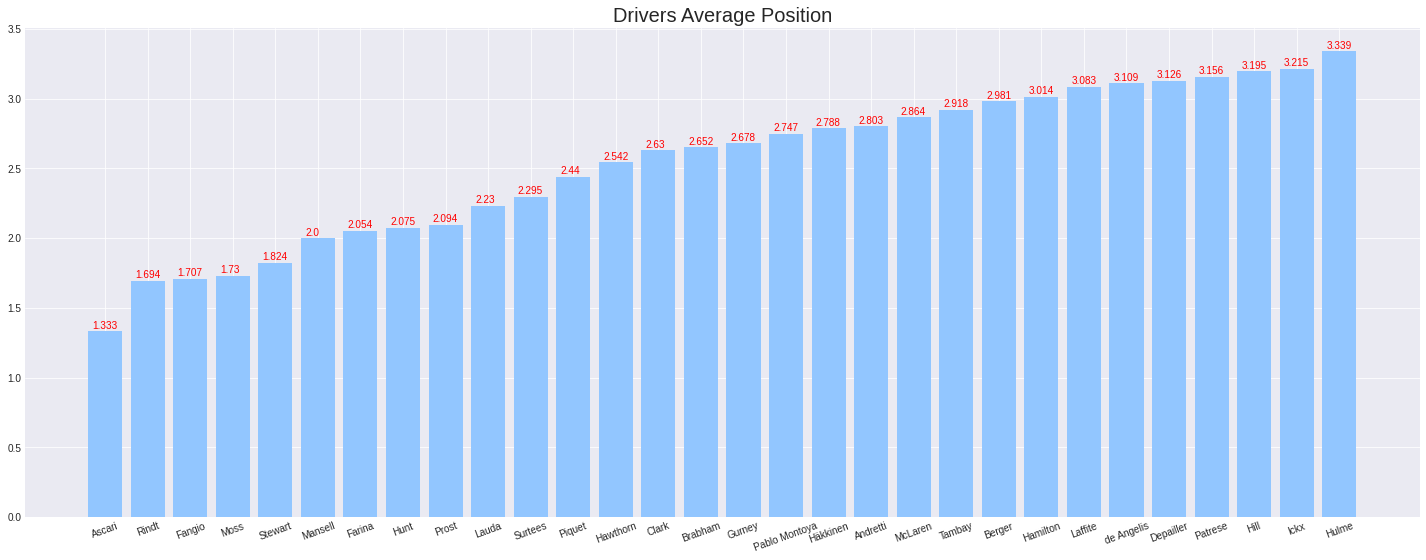

In [ ]:
temp1 = temp[temp['points']>100]
temp1 = temp1.sort_values(by = 'position', ascending = True).head(30)
label = round(temp1.position,3)
j = 0

plt.style.use('seaborn-pastel')
plt.figure(figsize = (25,9))
plt.bar(temp1.index, temp1.position)
for i in range(len(label)):
    plt.text(x = j-0.30 , y = label[i]+0.02, s = label[i], size = 10, color = 'red')
    j = j+1
plt.title('Drivers Average Position', fontsize = 20)
plt.xticks(rotation = 20)
plt.show()

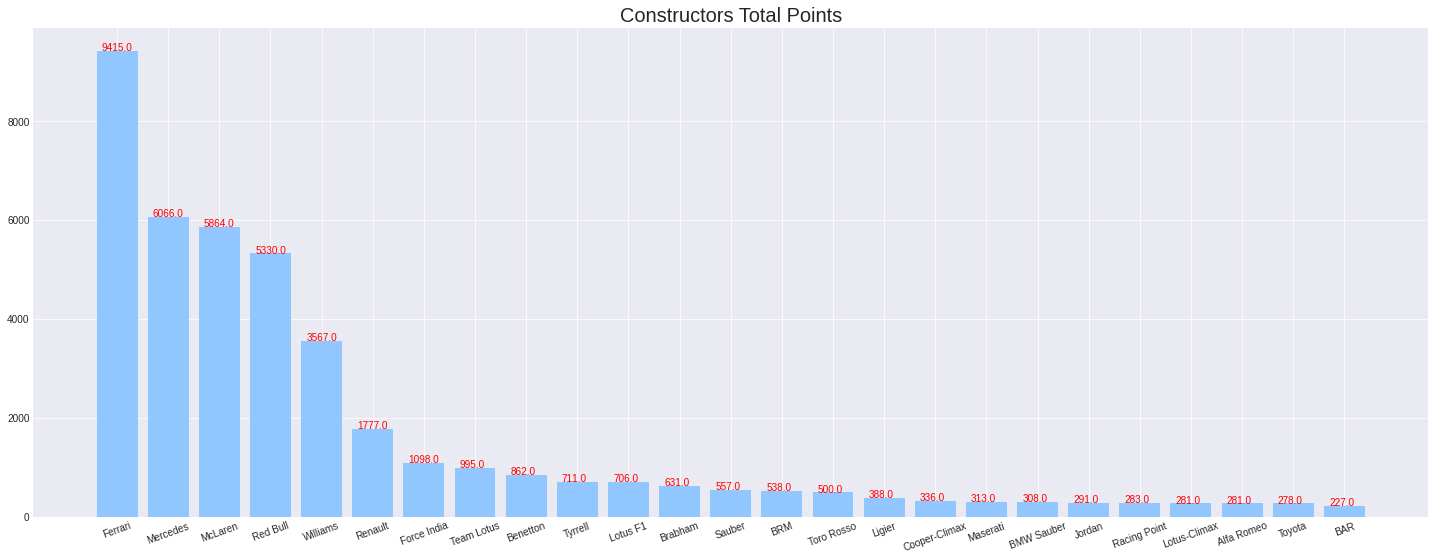

In [ ]:
temp = df.groupby('name_y').agg({'points':'sum','position':'mean'})
temp.columns = temp.columns.get_level_values(0)
temp1 = temp.sort_values(by = 'points', ascending = False).head(25)
label = round(temp1.points,0)
j = 0

plt.style.use('seaborn-pastel')
plt.figure(figsize = (25,9))
plt.bar(temp1.index, temp1.points)
for i in range(len(label)):
    plt.text(x = j-0.30 , y = label[i]+0.1, s = label[i], size = 10, color = 'red')
    j = j+1
plt.title('Constructors Total Points', fontsize = 20)
plt.xticks(rotation = 20)
plt.show()

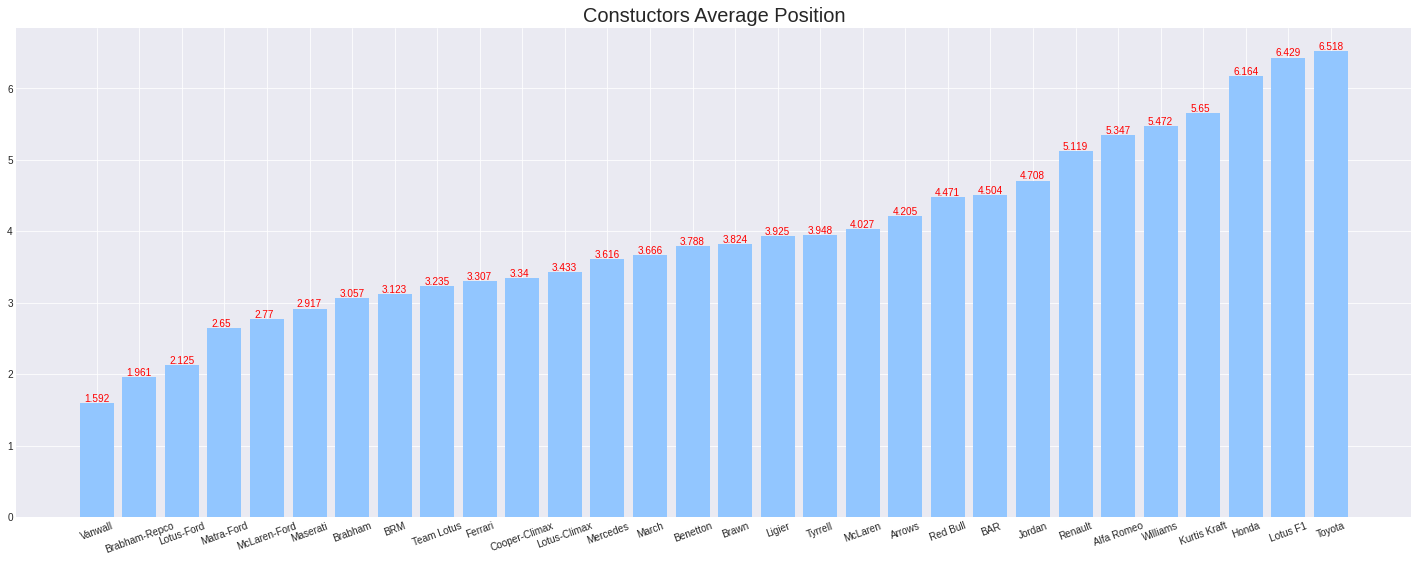

In [ ]:
temp1 = temp[temp['points']>100]
temp1 = temp1.sort_values(by = 'position', ascending = True).head(30)
label = round(temp1.position,3)
j = 0

plt.style.use('seaborn-pastel')
plt.figure(figsize = (25,9))
plt.bar(temp1.index, temp1.position)
for i in range(len(label)):
    plt.text(x = j-0.30 , y = label[i]+0.02, s = label[i], size = 10, color = 'red')
    j = j+1
plt.title('Constuctors Average Position', fontsize = 20)
plt.xticks(rotation = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


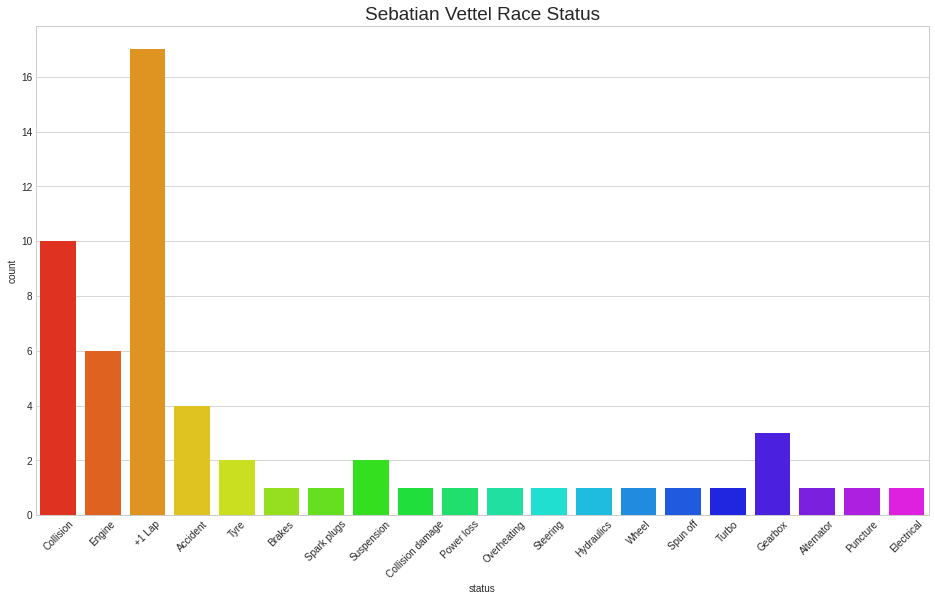

In [ ]:
temp = df[df['surname'] == 'Vettel']
temp = temp[temp['status'] != 'Finished']
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (16,9))
sns.countplot(temp['status'], palette='gist_rainbow')
plt.title('Sebatian Vettel Race Status', fontdict={'fontsize':19})
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


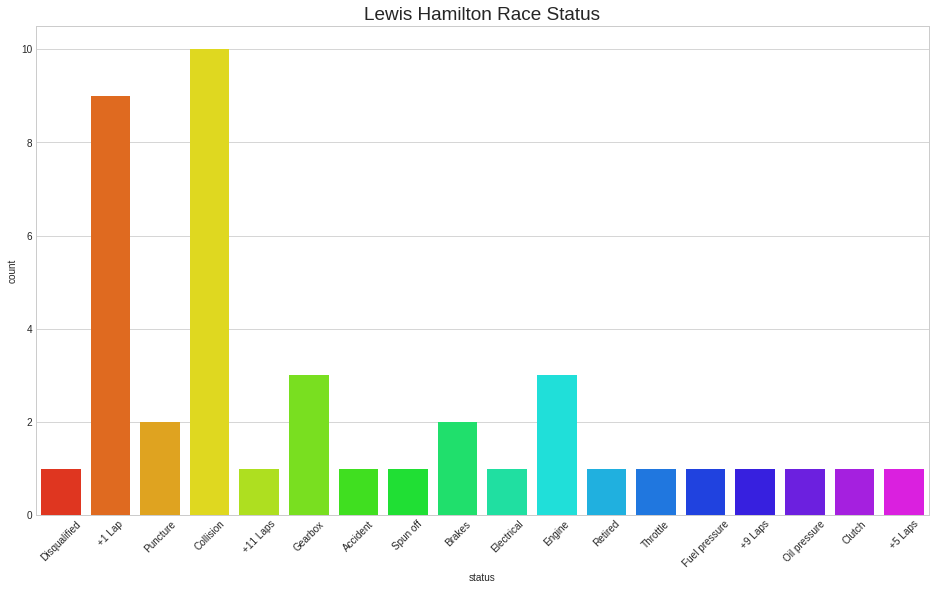

In [ ]:
temp = df[df['surname'] == 'Hamilton']
temp = temp[temp['status'] != 'Finished']
plt.figure(figsize = (16,9))
sns.countplot(temp['status'], palette='gist_rainbow')
plt.title('Lewis Hamilton Race Status', fontdict={'fontsize':19})
plt.xticks(rotation = 45)
plt.show()

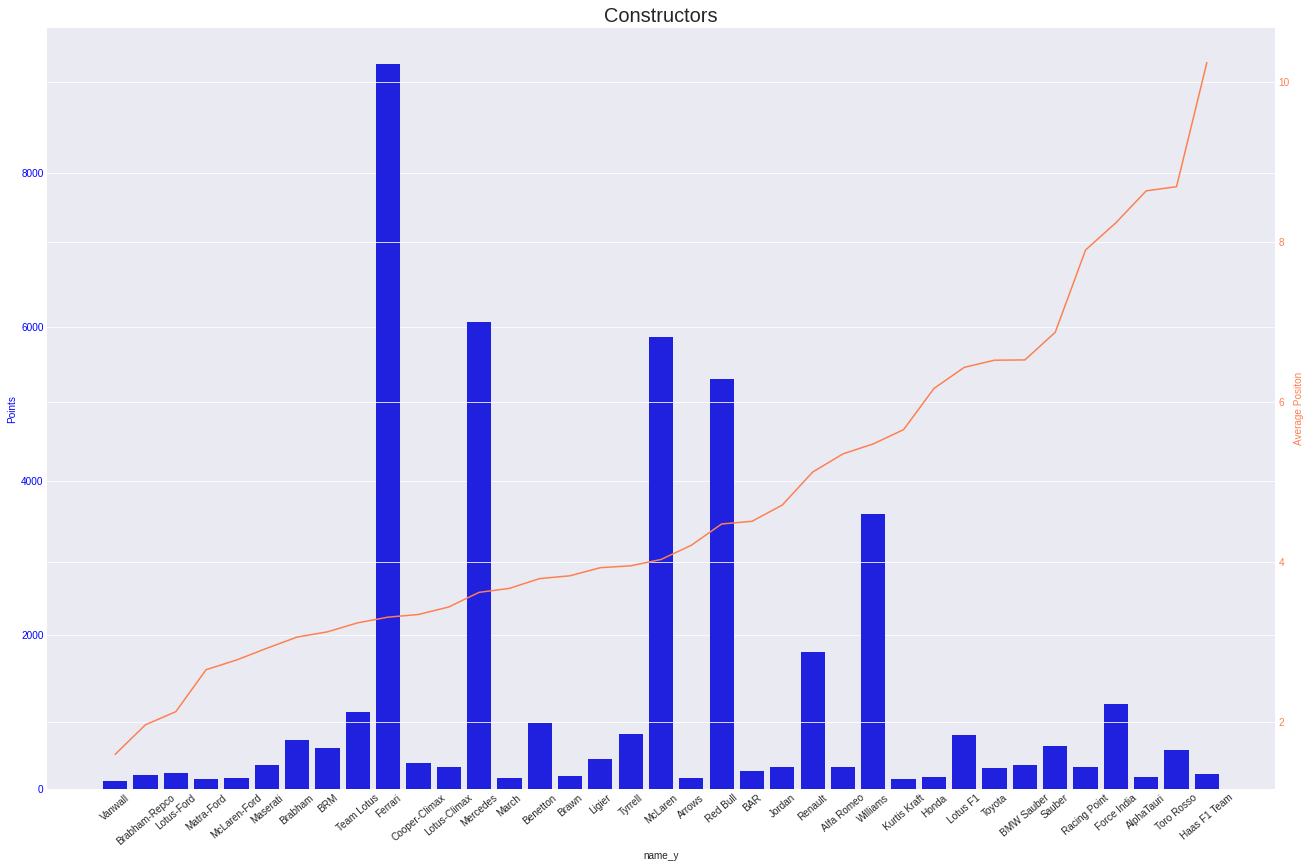

In [ ]:
n = '\\N'
df['position'] = df['position'].replace(n,0)
df['position'] = df.position.astype('int64')
temp = df.groupby('name_y').agg({'points':'sum','position':'mean'})
temp = temp[temp['points'] > 100]
temp = temp.sort_values(by = 'position')

plt.style.use('seaborn-darkgrid')
fig, ax1 = plt.subplots(figsize = (22,14))
ax2 = ax1.twinx()
sns.barplot(x = temp.index, y = temp['points'], color = 'blue', ax = ax1)
ax1.set_ylabel('Points', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation = 40)
sns.lineplot(y = temp['position'], x = temp.index,color = 'coral', ax = ax2)
ax2.tick_params(axis='y', labelcolor='coral')
ax2.set_ylabel('Average Positon', color='coral')
plt.title('Constructors', fontdict = {'fontsize':20})
plt.xlabel('Constuctors')
plt.show()

In [ ]:
def box_dist(df,x):
  quantile3 = df[x].quantile(0.75)
  quantile1 = df[x].quantile(0.25)

  plt.style.use('ggplot')
  fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,7))
  sns.boxplot(y = df[x],ax = ax1, color = 'coral')
  ax1.text(0, quantile3, 'Upper Quantile: %s' %str(round(quantile3,2)), size=11, rotation=0,ha="center", va="bottom", color = 'blue')
  ax1.text(0, quantile1, 'Lower Quantile: %s' %str(round(quantile1,2)), size=11, rotation=0,ha="center", va="bottom", color = 'blue')
  ax1.set_title('Boxplot')
  
  mean_val = df[x].values.mean()
  sns.distplot(df[x], ax = ax2, color = 'blue', bins = 10)
  ax2.axvline(mean_val, color='red', linestyle='dashed', linewidth=1)
  ax2.text(mean_val, 0.01, 'Mean value is '+str(mean_val), ha = 'right', rotation = 'vertical', color = 'red')
  ax2.set_title('Distribution')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


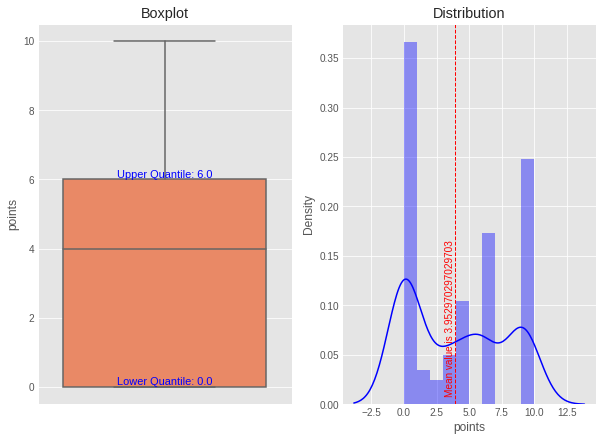

In [ ]:
temp = df[df['surname'] == 'Prost']
box_dist(df = temp, x = 'points')

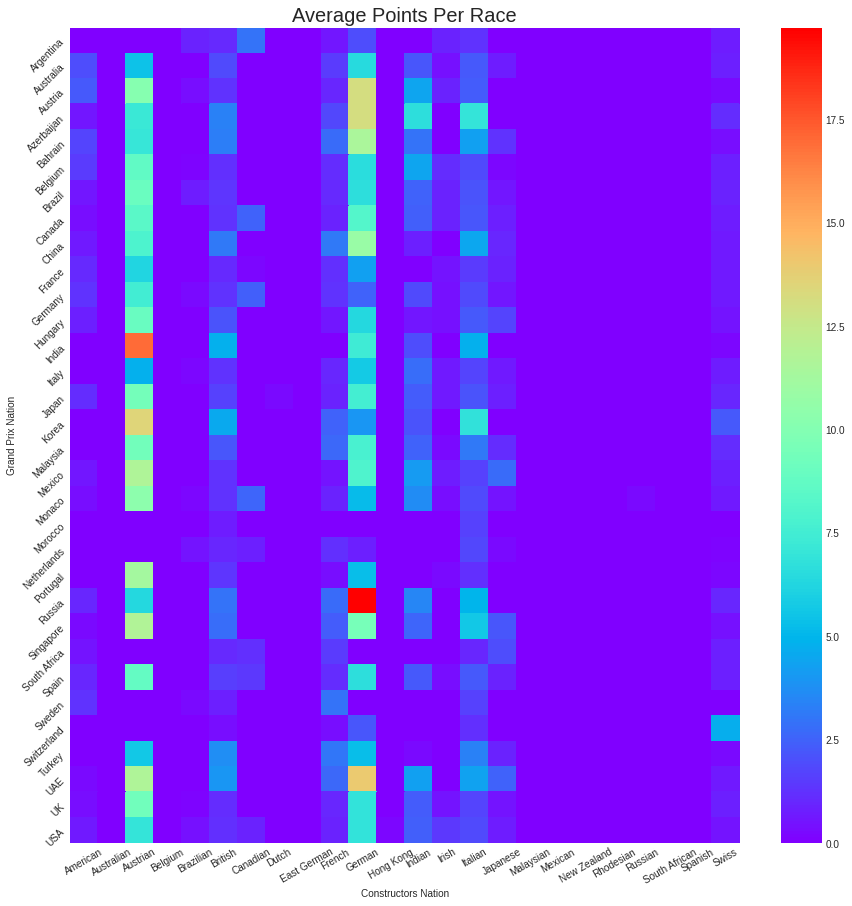

In [ ]:
temp = df.pivot_table(index = 'country',columns = 'constructor_nation', values='points', aggfunc='mean').fillna(0)

plt.figure(figsize = (15,15))
sns.heatmap(temp, cmap = 'rainbow')
plt.xlabel('Constructors Nation')
plt.ylabel('Grand Prix Nation')
plt.xticks(rotation = 30)
plt.yticks(rotation = 45)
plt.title('Average Points Per Race',fontsize = 20)
plt.show()

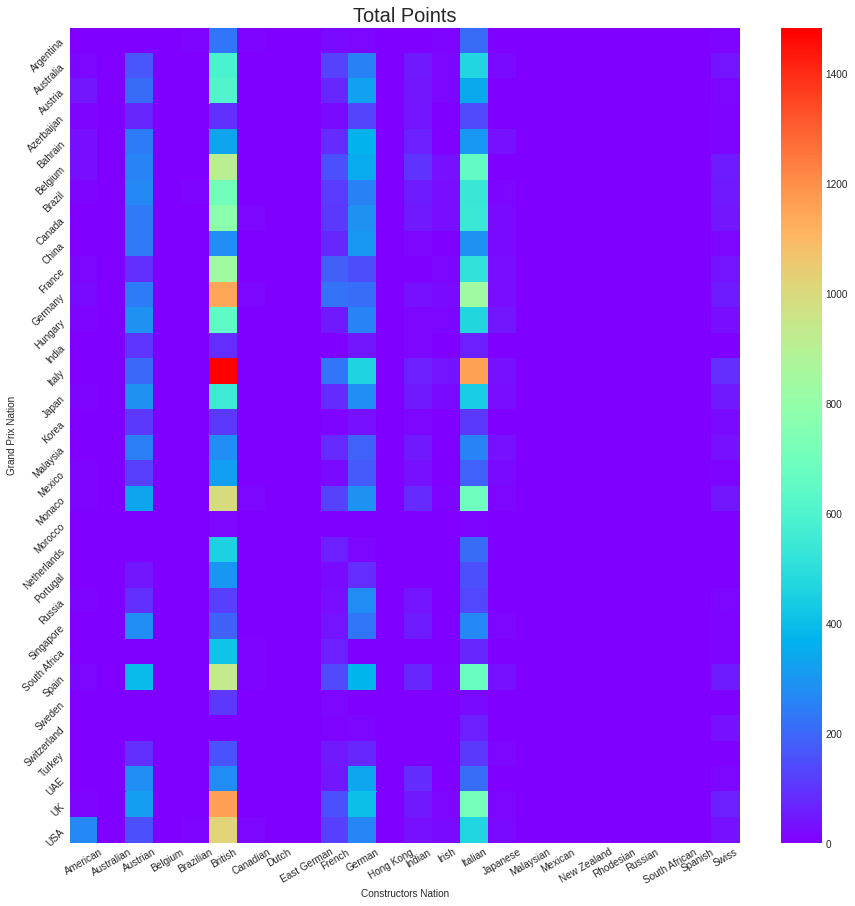

In [ ]:
temp = df.pivot_table(index = 'country',columns = 'constructor_nation', values='points', aggfunc='sum').fillna(0)

plt.figure(figsize = (15,15))
sns.heatmap(temp, cmap = 'rainbow')
plt.xlabel('Constructors Nation')
plt.ylabel('Grand Prix Nation')
plt.xticks(rotation = 30)
plt.yticks(rotation = 45)
plt.title('Total Points',fontsize = 20)
plt.show()

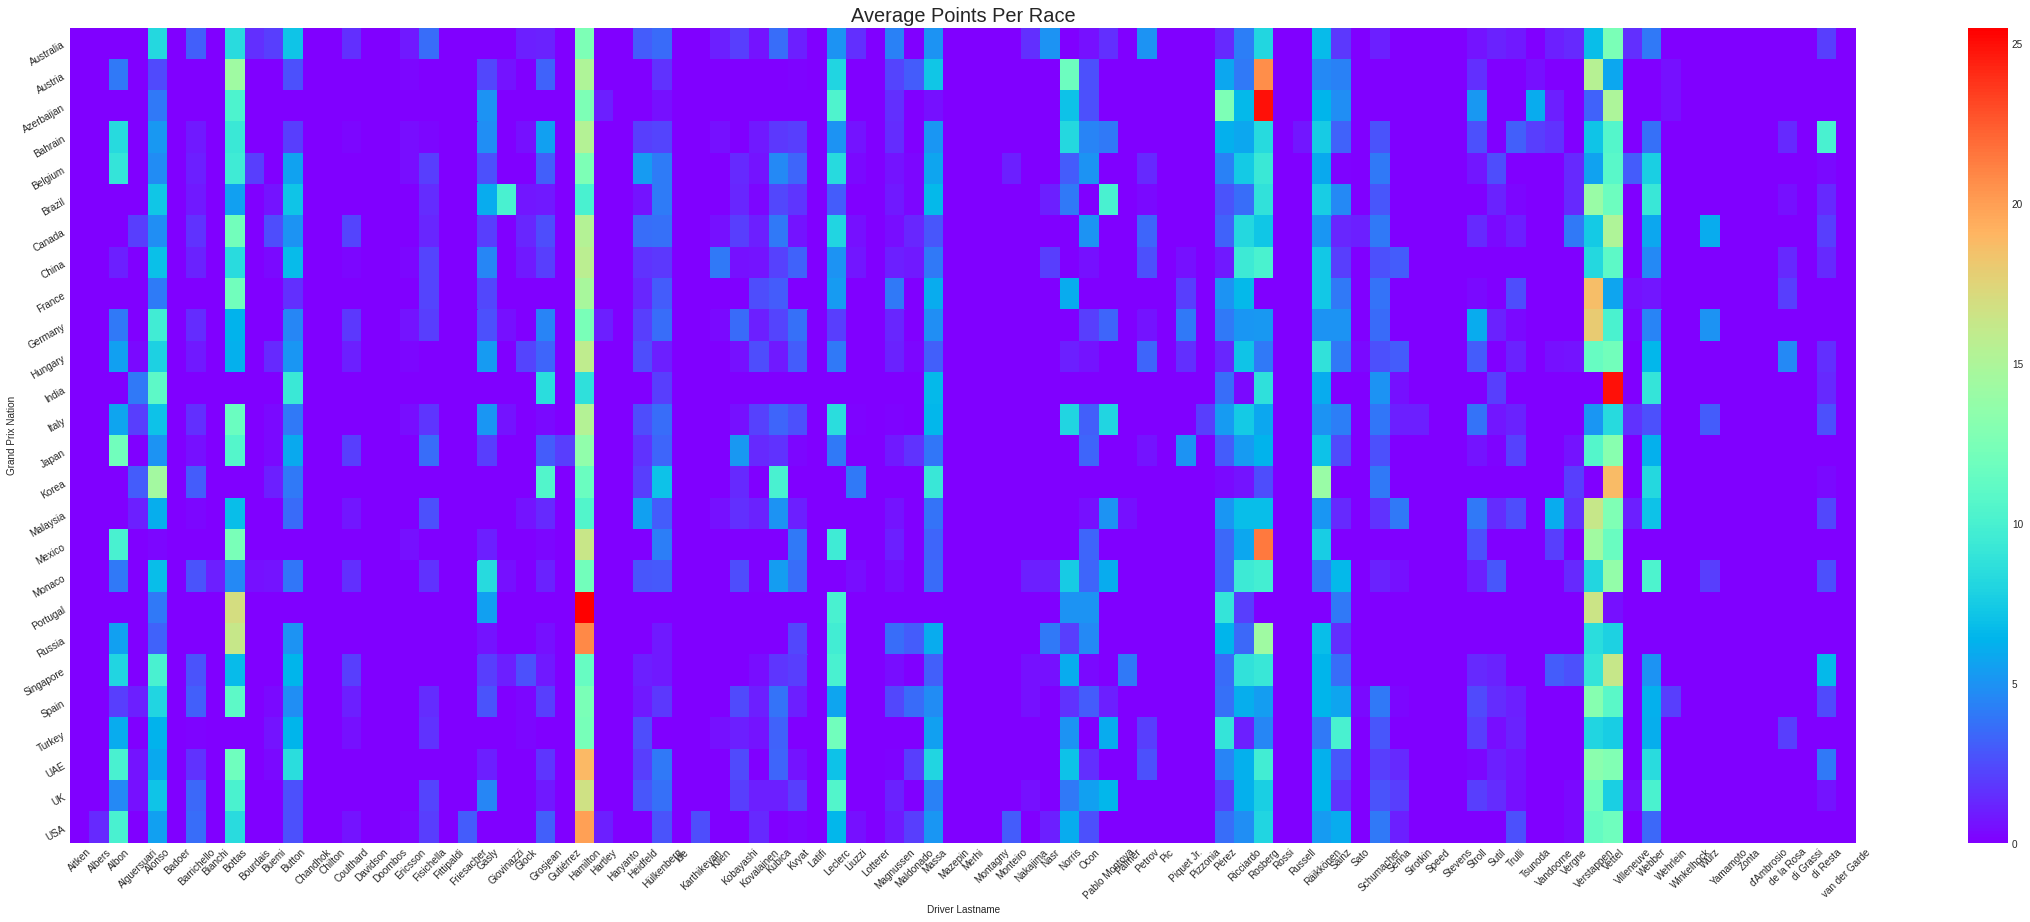

In [ ]:
temp = df[df['year'] >= 2005]
temp = temp.pivot_table(index = 'country',columns = 'surname', values='points', aggfunc='mean').fillna(0)

plt.figure(figsize = (40,15))
sns.heatmap(temp, cmap = 'rainbow')
plt.xlabel('Driver Lastname')
plt.ylabel('Grand Prix Nation')
plt.xticks(rotation = 45)
plt.yticks(rotation = 30)
plt.title('Average Points Per Race',fontsize = 20)
plt.show()

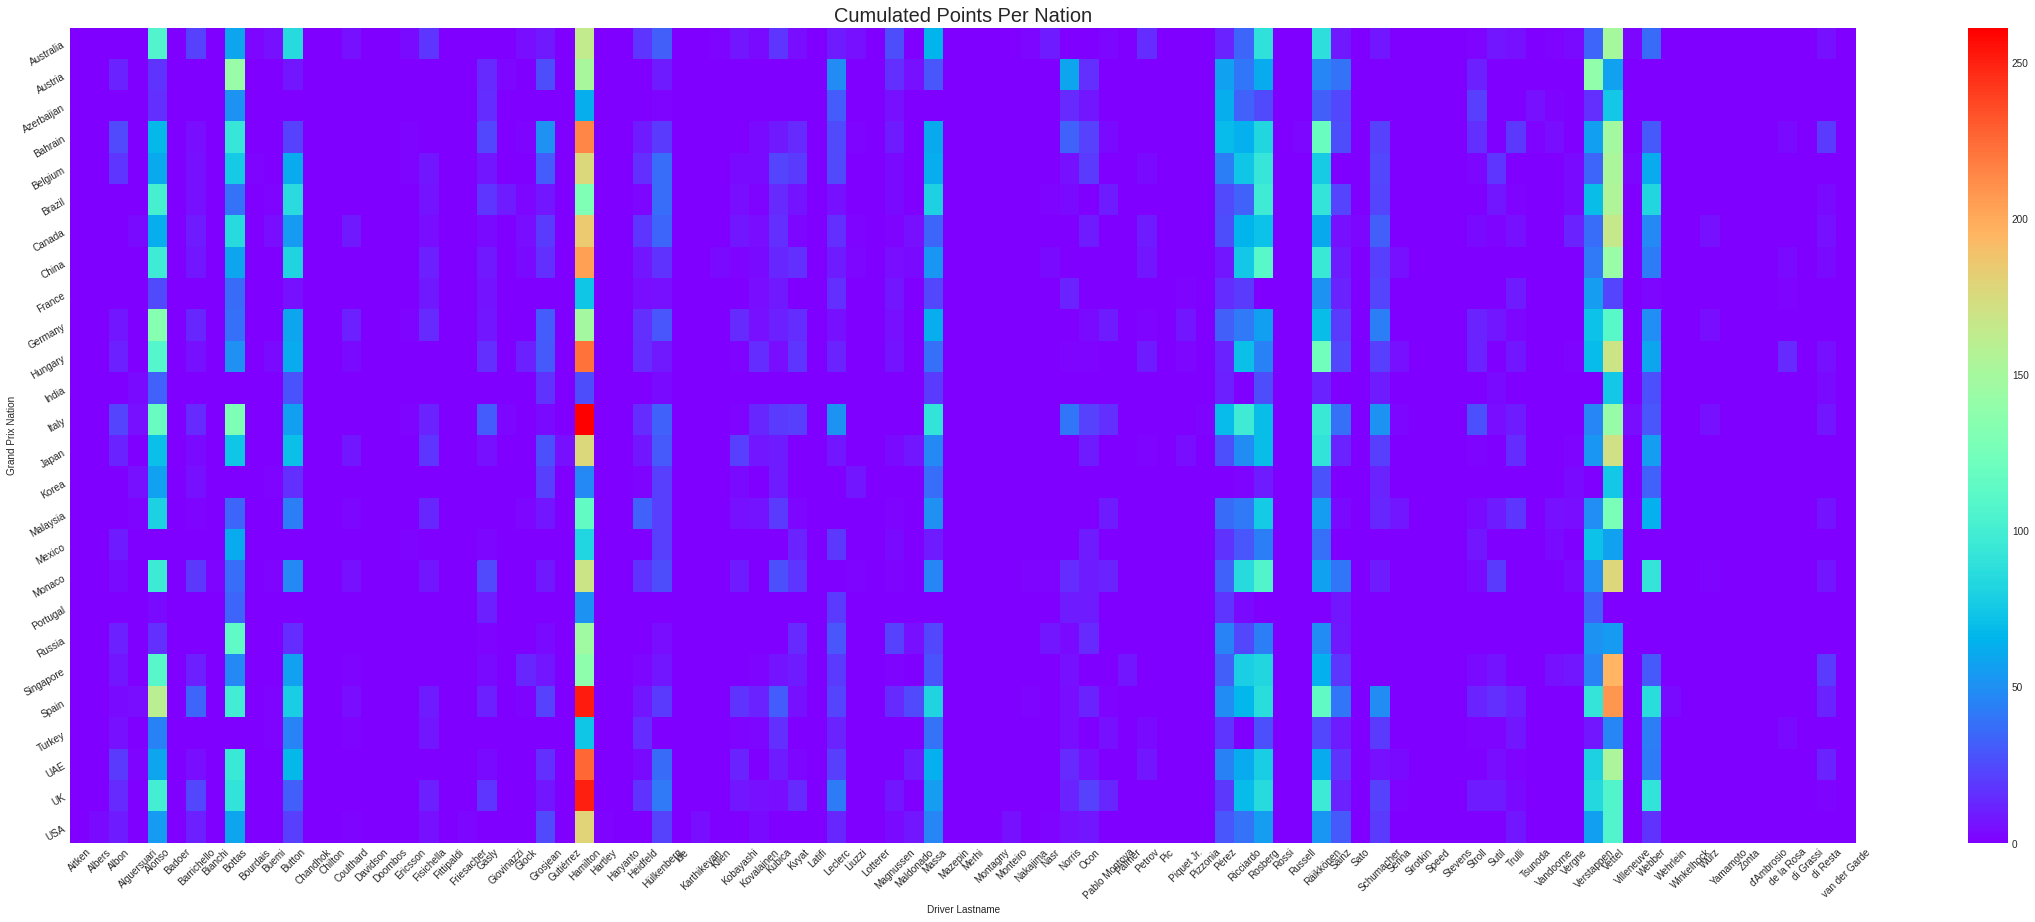

In [ ]:
temp = df[df['year'] >= 2005]
temp = temp.pivot_table(index = 'country',columns = 'surname', values='points', aggfunc='sum').fillna(0)

plt.figure(figsize = (40,15))
sns.heatmap(temp, cmap = 'rainbow')
plt.xlabel('Driver Lastname')
plt.ylabel('Grand Prix Nation')
plt.xticks(rotation = 45)
plt.yticks(rotation = 30)
plt.title('Cumulated Points Per Nation',fontsize = 20)
plt.show()

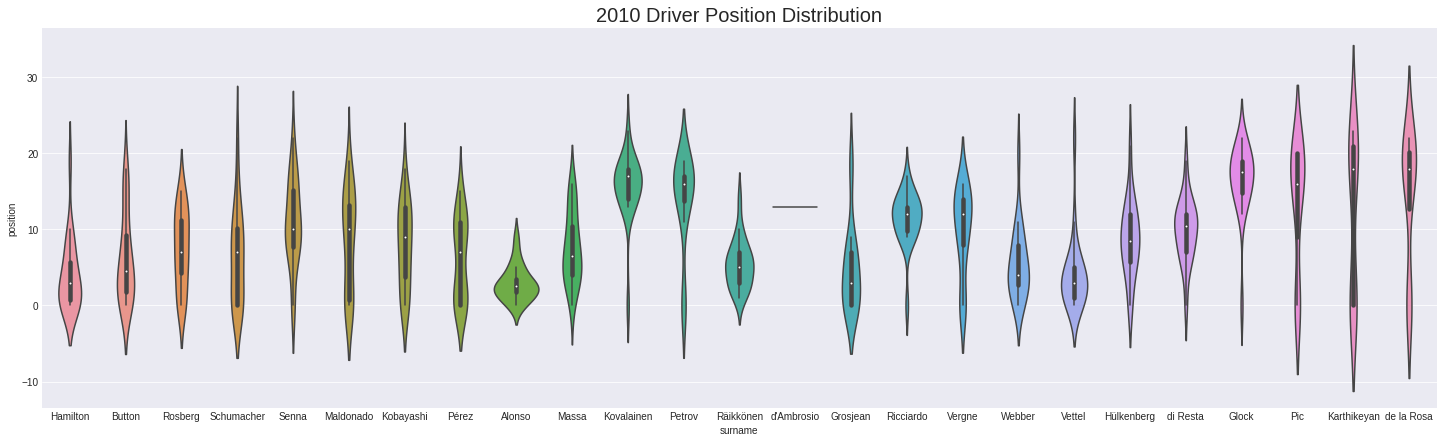

In [ ]:
temp = df[df['year'] == 2012]

plt.figure(figsize = (25,7))
sns.violinplot(x=temp["surname"], y=temp["position"])
plt.title('2010 Driver Position Distribution', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


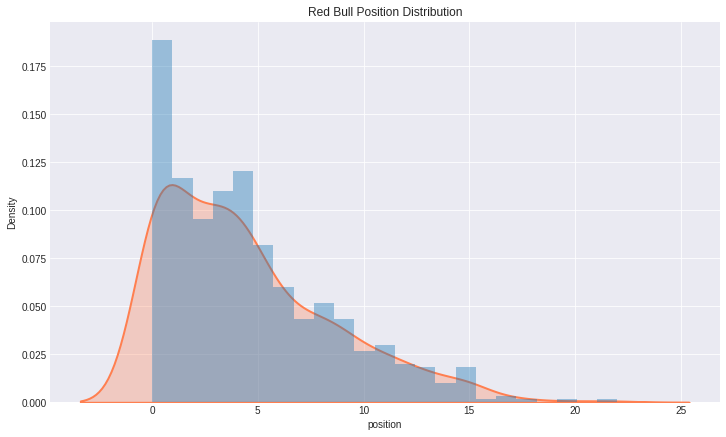

In [ ]:
temp = df[df['name_y'] == 'Red Bull']

plt.figure(figsize = (12,7))
sns.distplot(temp["position"], bins = 23,
             kde=True, kde_kws={"color": "coral", "alpha": 0.3, "linewidth": 2, "shade": True})
plt.title('Red Bull Position Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


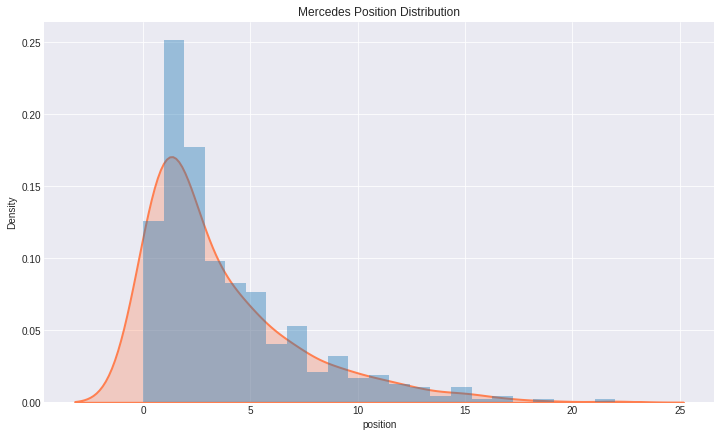

In [ ]:
temp = df[df['name_y'] == 'Mercedes']

plt.figure(figsize = (12,7))
sns.distplot(temp["position"], bins = 23,
             kde=True, kde_kws={"color": "coral", "alpha": 0.3, "linewidth": 2, "shade": True})
plt.title('Mercedes Position Distribution')
plt.show()

In [ ]:
temp = df.groupby(['surname','year']).agg({'points':'sum'})

temp = temp.groupby("year").apply(lambda x: x.nlargest(3, "points")).reset_index(level = [-1]).drop(columns = 'year')

temp.iloc[12:36,:]

points
year surname            
1954 Fangio        57.14
     González      26.64
     Hawthorn      24.64
1955 Fangio        41.00
     Moss          23.00
     Castellotti   12.00
1956 Fangio        34.50
     Moss          28.00
     Collins       25.00
1957 Fangio        46.00
     Moss          25.00
     Musso         16.00
1958 Hawthorn      49.00
     Moss          41.00
     Brooks        24.00
1959 Brabham       34.00
     Brooks        27.00
     Moss          25.50
1960 Brabham       43.00
     McLaren       37.00
     Hill          20.00
1961 Hill          41.00
     von Trips     33.00
     Gurney        21.00

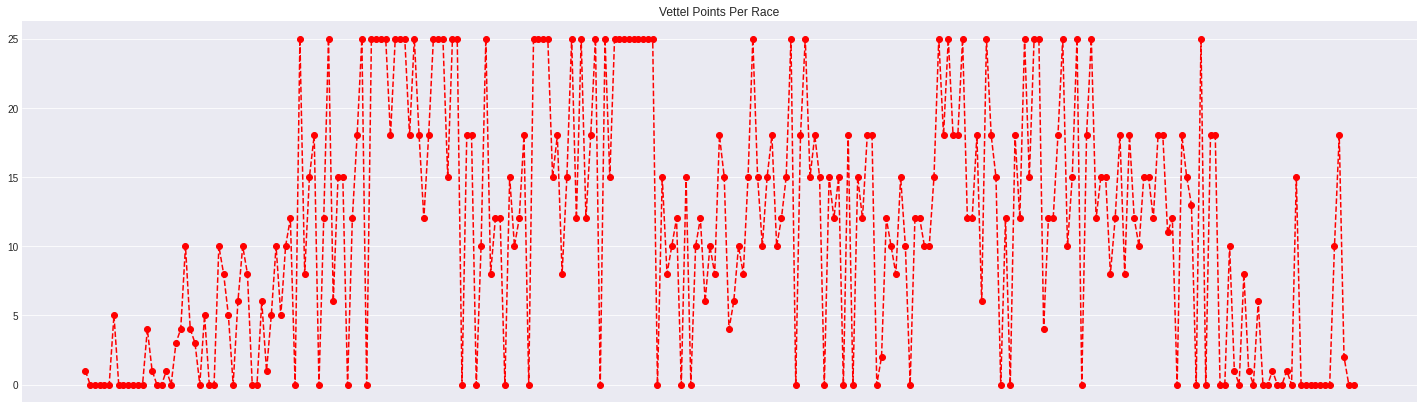

In [ ]:
df = pd.merge(df,race[['raceId','round']],on = 'raceId')
temp = df[df['surname'] == 'Vettel']
temp = temp.sort_values(by = ['year','round'], ascending=[True, True])
temp['y_round'] = temp.apply(lambda x: str(x['year'])+'_'+str(x['round']),axis = 1)

plt.figure(figsize = (25,7))
plt.plot('y_round', 'points', data = temp, marker='o', color='red', linestyle='--')
plt.title('Vettel Points Per Race')
plt.xticks([])
plt.show()

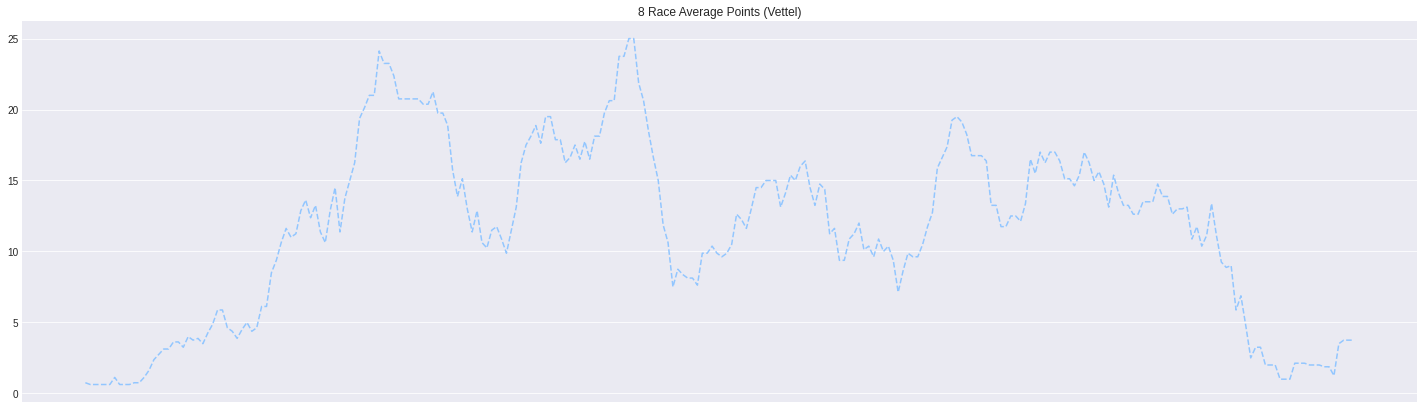

In [ ]:
temp = df[df['surname'] == 'Vettel']
temp = temp.sort_values(by = ['year','round'], ascending=[True, True])
temp['y_round'] = temp.apply(lambda x: str(x['year'])+'_'+str(x['round']),axis = 1)
temp['points_5race'] = temp.points.rolling(8).mean()

plt.figure(figsize = (25,7))
plt.plot('y_round','points_5race', data = temp,linestyle='--')
plt.title('8 Race Average Points (Vettel)')
plt.xticks([])
plt.show()

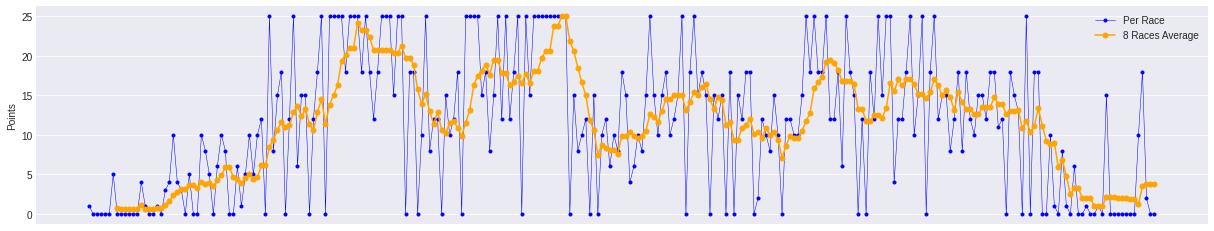

In [ ]:
fig, ax = plt.subplots(figsize = (21,4))
ax.plot(temp['y_round'],temp.points, marker='.', linestyle='-', linewidth=0.5, label='Per Race', color = 'blue')
ax.plot(temp['y_round'],temp.points_5race, marker='o', markersize=5, linestyle='-', label='8 Races Average', color = 'orange')
ax.set_ylabel('Points')
ax.set_xticks([])
ax.legend();

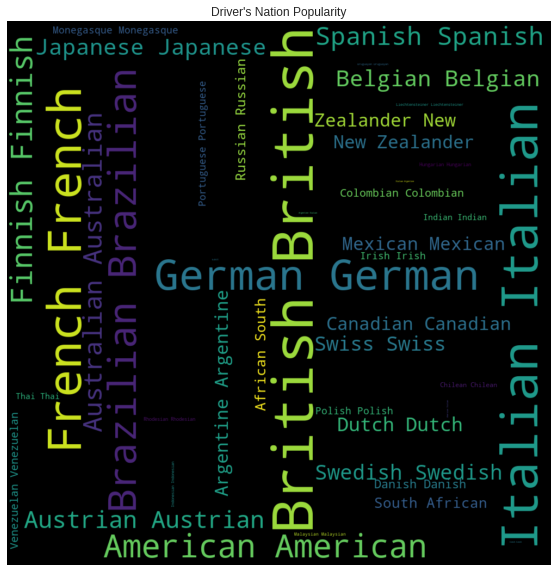

In [ ]:
from wordcloud import WordCloud
temp = df.sort_values(by = 'driver_nation')
wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(','.join(temp['driver_nation'].tolist()).replace(',',' '))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Driver's Nation Popularity")
plt.show()

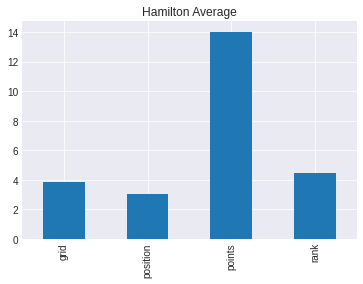

In [ ]:
n = '\\N'
df['rank'] = df['rank'].replace(n,0)
df['rank'] = df['rank'].astype('int64')

temp = df[df['surname'] == 'Hamilton']
temp = temp[['grid','position','points','rank']].mean()
temp.plot(kind = 'bar', title = 'Hamilton Average')

In [ ]:
temp = df[df['surname'] == 'Hamilton']
temp[['grid','position','points','rank']].describe()

,grid,position,points,rank
count,280.000000,280.000000,280.000000,280.000000
mean,3.875000,3.014286,14.028571,4.492857
std,4.612833,3.246141,9.486412,4.332087
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,6.000000,2.000000
50%,2.000000,2.000000,15.000000,3.000000
75%,4.000000,4.000000,25.000000,5.000000
max,24.000000,19.000000,50.000000,23.000000


In [ ]:
df.status.map({'Finished':1,'Collision':-1})

0        1.0
1        1.0
2        1.0
3       -1.0
4        1.0
        ... 
25135    NaN
25136    NaN
25137    NaN
25138    NaN
25139    NaN
Name: status, Length: 25140, dtype: float64

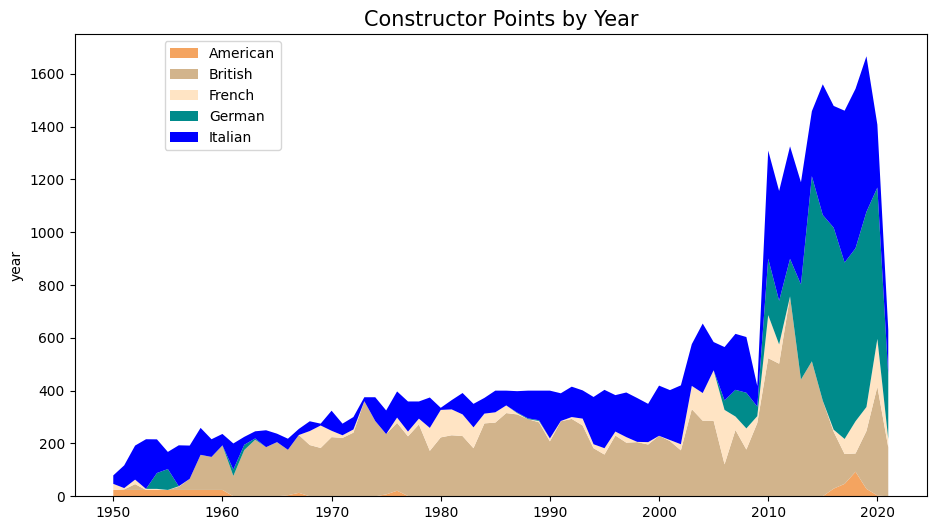

In [23]:
temp = pd.pivot_table(index = 'year',columns='constructor_nation',values = 'points', data = df, aggfunc='sum')
temp = temp[['American','British','French','German','Italian']].fillna(0)

plt.style.use('default')
plt.figure(figsize = (11,6))
plt.stackplot(temp.index,temp['American'],temp['British'],temp['French'],temp['German'],temp['Italian'], colors=['sandybrown', 'tan', 'bisque', 'darkcyan','blue'])
plt.legend(labels = ['American','British','French','German','Italian'],bbox_to_anchor=(0.25, 1.0),fancybox=True, shadow=False)
plt.title('Constructor Points by Year',fontsize = 15)
plt.ylabel('year')
plt.show()

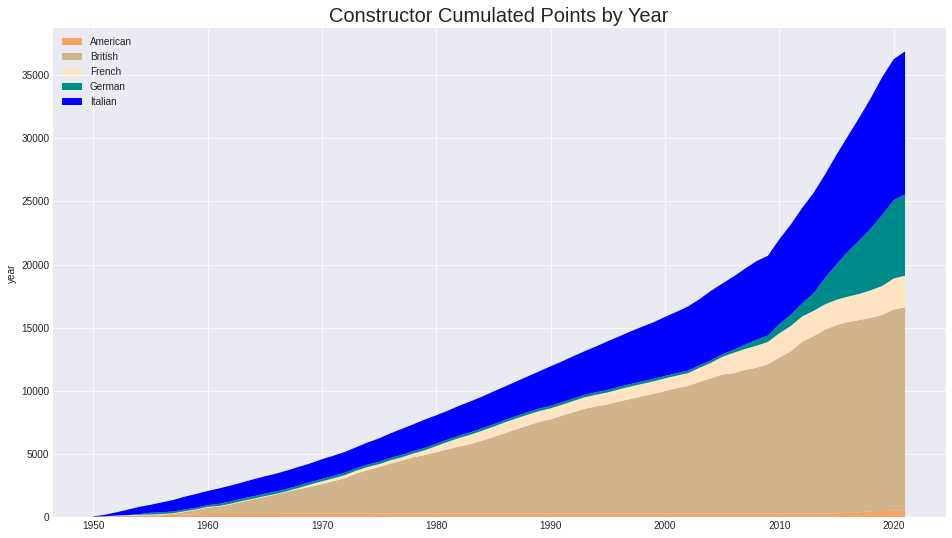

In [ ]:
temp = temp.cumsum()

plt.style.use('ggplot')
plt.figure(figsize = (16,9))
plt.stackplot(temp.index,temp['American'],temp['British'],temp['French'],temp['German'],temp['Italian'], colors=['sandybrown', 'tan', 'bisque', 'darkcyan','blue'])
plt.legend(labels = ['American','British','French','German','Italian'],loc = 'upper left')
plt.title('Constructor Cumulated Points by Year',fontsize = 20)
plt.ylabel('year')
plt.show()

In [ ]:
temp.tail(1)

constructor_nation,American,British,French,German,Italian
year,,,,,
2021,510.0,16109.0,2495.0,6432.14,11319.41


In [ ]:
temp.unstack().head(10)

constructor_nation  year
American            1950     24.0
                    1951     48.0
                    1952     72.0
                    1953     96.0
                    1954    120.0
                    1955    144.0
                    1956    168.0
                    1957    192.0
                    1958    216.0
                    1959    240.0
dtype: float64

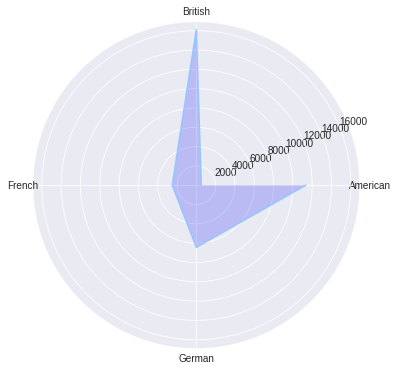

In [ ]:
value = temp.sum().values
nation = temp.columns
theta = np.linspace(0, 2*np.pi, 5)

plt.figure(figsize = (10,6))
plt.subplot(polar=True)
(line,label) = plt.thetagrids(range(0,360, int(360/4)),nation)
plt.plot(theta, value)
plt.fill(theta, value, 'b', alpha=0.2)
plt.show()

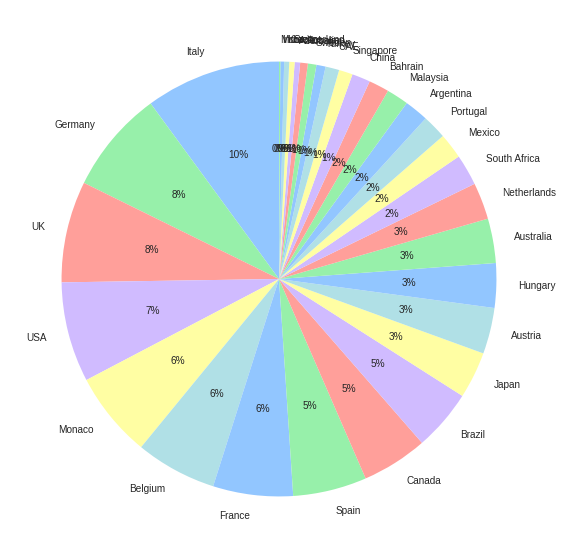

In [ ]:
temp = pd.DataFrame(df.country.value_counts())

plt.style.use('seaborn-pastel')
plt.figure(figsize = (10,10))
plt.pie(temp.country,labels = temp.index, startangle=90,autopct='%1.0f%%')
plt.show()

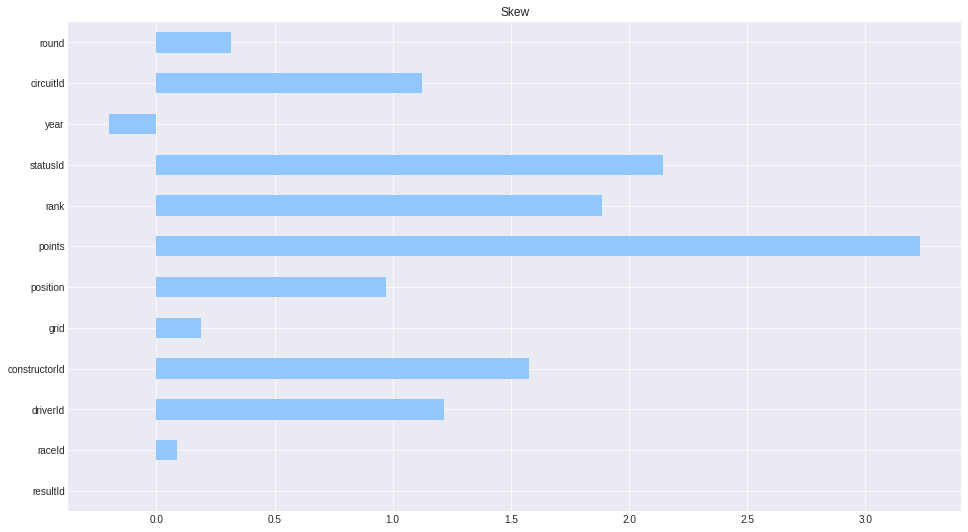

In [ ]:
df.skew().plot(figsize = (16,9),title = 'Skew', kind = 'barh')

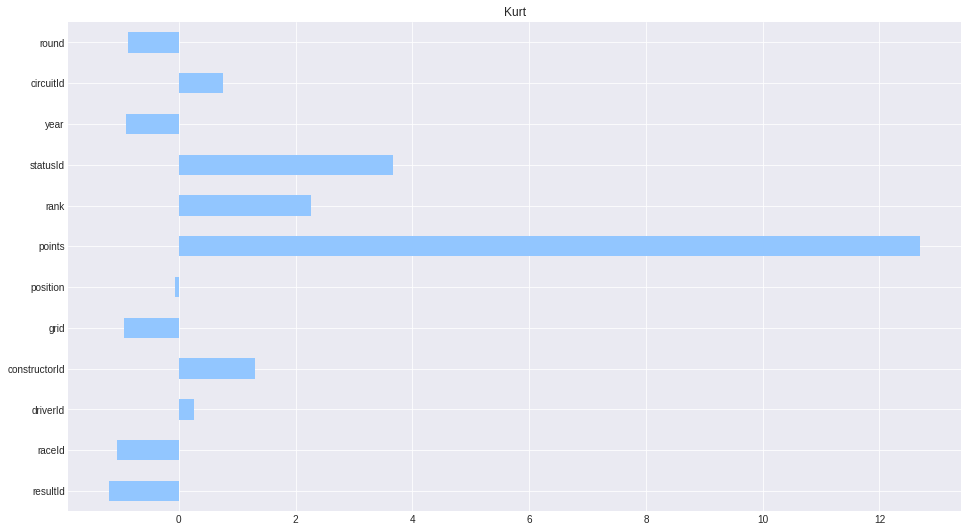

In [ ]:
df.kurt().plot(figsize = (16,9),title = 'Kurt', kind = 'barh')

In [ ]:
plt.fill_between()